# Forger

This is a notebook about General Adversarial Networks. Data from Kaggle : https://www.kaggle.com/ikarus777/best-artworks-of-all-time. 

In [71]:
import keras
from keras.optimizers import Adam

from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


DATA_PATH = "D:/Mady/Data/130081_310927_bundle_archive/images/images/Vincent_van_Gogh/Vincent_van_Gogh_706.jpg"
RESIZED_PATH = "D:/Mady/Data/130081_310927_bundle_archive/resized/resized/"
OUTPUT_PATH = "D:/Mady/Data/130081_310927_bundle_archive/artists.csv"

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
4


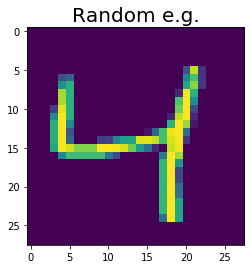

In [54]:
from keras.datasets import mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

plt.figure()
plt.title("Random e.g.", fontsize=20)
plt.imshow(x_train[2].astype(int))
print(y_train[2])

(1024, 784, 3)
(794, 600, 3)


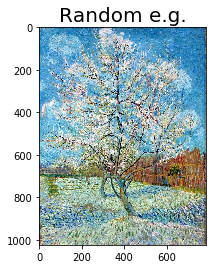

In [55]:
from keras.preprocessing.image import load_img, save_img, img_to_array

##im1= np.array(img_to_array(load_img(DATA_PATH)))
##im2= np.array(img_to_array(load_img(RESIZED_PATH)))


im1b= np.array(img_to_array(load_img("D:/Mady/Data/130081_310927_bundle_archive/images/images/Vincent_van_Gogh/Vincent_van_Gogh_708.jpg")))
im2b= np.array(img_to_array(load_img("D:/Mady/Data/130081_310927_bundle_archive/resized/resized/Vincent_van_Gogh_707.jpg")))


print(im1b.shape)
print(im2b.shape)

plt.figure()
plt.title("Random e.g.", fontsize=20)
plt.imshow(im1b.astype(int))


In [67]:
def preprocess_image(img):
    NEW_WIDTH, NEW_HEIGHT = 200, 200
        
    loaded_img = load_img(img)
    resized_img = loaded_img.resize((NEW_WIDTH, NEW_HEIGHT))
    new_img = np.array(img_to_array(resized_img))
    return new_img

output_df = pd.read_csv(OUTPUT_PATH)
paintings=[]
outputs=[]
gallery= os.listdir(RESIZED_PATH)
for painting in gallery:
    paintings.append(preprocess_image(RESIZED_PATH+painting))
    outputs.append(output_df[output_df['name'].str.contains(painting.split("_")[0])]["id"].iloc[0])

print(len(paintings))
print(len(outputs))

zipped = list(zip(paintings,outputs))
random.shuffle(zipped)
paintings, outputs = zip(*zipped)

8683
8683


In [68]:
paintings = np.stack(paintings)
print(paintings.shape)
print(len(paintings))
print(paintings.reshape(8683, 40000, 3 ).shape)


(8683, 200, 200, 3)
8683
(8683, 40000, 3)


In [69]:
NUM_PAINTINGS = len(paintings)
x_train, x_test = paintings[:round(NUM_PAINTINGS*0.9)], paintings[round(NUM_PAINTINGS*0.9):]
y_train, y_test = outputs[:round(NUM_PAINTINGS*0.9)], outputs[round(NUM_PAINTINGS*0.9):]

In [70]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

7815
868
7815
868


In [72]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)